In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random
import time
%matplotlib inline
import matplotlib.animation as animation
import csv
# matplotlib.style.use('seaborn')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import manifold
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
# from wordcloud import WordCloud
from sklearn.feature_extraction import text

from mpl_toolkits.mplot3d import Axes3D

In [2]:
blog_data=pd.read_csv("blogtext.csv")

In [3]:
blog_data.drop_duplicates(subset="text",inplace=True)
blog_data.date = pd.to_datetime(blog_data.date,format="%d,%B,%Y", errors='coerce')#pd.to_datetime(blog_data.date,errors="coerce",infer_datetime_format=True)
print(blog_data.shape)
blog_data.sample(20)

(611652, 7)


,id,gender,age,topic,sign,date,text
58169,1685295,female,17,Student,Capricorn,2004-05-17,new blogger means new look. blogger...
413840,1274152,female,34,indUnk,Scorpio,2004-02-09,I know. It's a low blow. And an urlL...
571678,2467556,female,16,Student,Aries,NaT,"oh man, today was the best da..."
530798,2224636,female,17,indUnk,Aries,2004-03-23,WOW!! ME? REALLY? Yesterday ju...
43008,3304516,male,27,Technology,Pisces,2004-06-17,My brother has left To start anew And b...
432116,2710312,male,25,Technology,Cancer,2004-04-16,Let's dive in headfirst. First mile...
500747,1844068,male,25,Transportation,Pisces,2004-08-06,CURRENT MOOD: Very happy. LISTENING...
604269,942828,female,34,indUnk,Cancer,2003-06-29,On this day in 1607 ... my s...
254004,3689206,male,23,Publishing,Aries,2004-06-23,Well what a f**king yin yang of a d...
301337,2443593,female,25,indUnk,Leo,2004-05-10,"Yeah, I know. It's been awhi..."


In [4]:
# ####################################################################################################
# #####                            Sampling for code develpoment 
# #####                            Remove after validating code
# ####################################################################################################

blog_data=blog_data.sample(frac=.02)#.02

print("******WARNING****** \n DATASET SAMPLED!!!!!!")
print(blog_data.shape)

******WARNING****** 
 DATASET SAMPLED!!!!!!
(12233, 7)


# Word Embeddings

In [5]:
adit_stpwrds=["urllink","nbsp","ve","ll"]
stp_wrds = text.ENGLISH_STOP_WORDS.union(adit_stpwrds)

In [6]:
tfidf_transformer = TfidfVectorizer(stop_words=stp_wrds,max_features=1000 )
n_grams_tfidf = tfidf_transformer.fit_transform(blog_data["text"])
n_grams_tfidf.shape

(12233, 1000)

In [7]:
# plt.figure(figsize=(16,16))
# plt.spy(n_grams_tfidf,markersize=.5, marker="o",aspect='auto')
# plt.title("TF-IDF matrix")

In [8]:
top_n=150
txt_info= n_grams_tfidf.toarray().sum(axis=0)
indices = np.argsort(txt_info)[::-1]
features =tfidf_transformer.get_feature_names()
top_features = np.array([[features[i],float(txt_info[i])] for i in indices[:top_n]])
pd.DataFrame({"word":top_features[:,0],"info":top_features[:,1]})[:50]

,info,word
0,518.2774426904599,just
1,492.9666281171102,like
2,368.377451086662,know
3,365.21923594498816,time
4,341.8836204235988,don
5,338.3205011110898,really
6,316.23797884833135,think
7,312.86587807380454,good
8,308.4425434303766,people
9,305.12219726648135,got


Text(0.5, 1.0, 'Term info sorted')

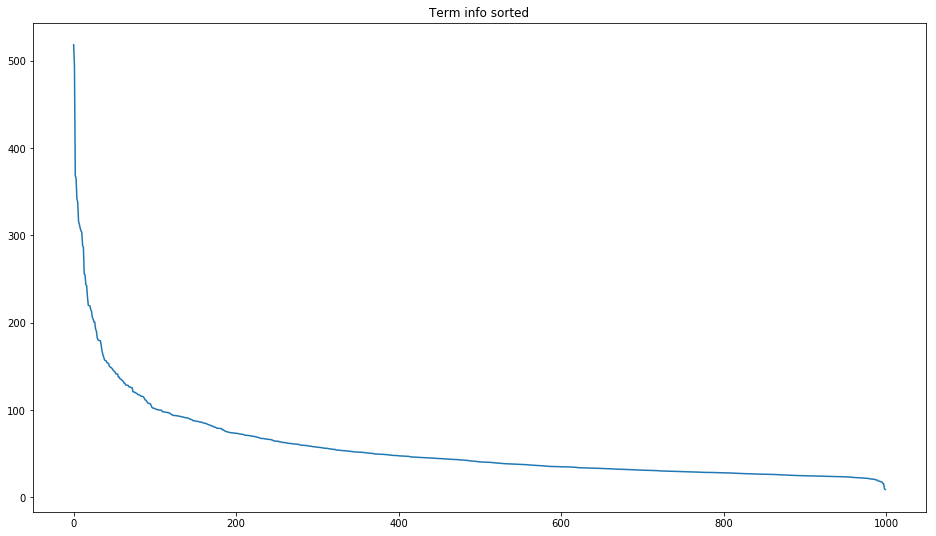

In [9]:
plt.figure(figsize=(16,9))
plt.plot(txt_info[indices])#[indices[:top_n]]
plt.title("Term info sorted")

In [10]:
# n_grams_count_top=n_grams_tfidf.toarray()[:,indices[:top_n]]

In [11]:
# plt.figure(figsize=(16,16))
# plt.spy(n_grams_count_top,markersize=.5,aspect='auto', marker="o")
# plt.title("Top term info matrix")

In [12]:
# text_ward_full=hierarchy.linkage(n_grams_count_top, 'ward')#(n_grams_tfidf.toarray(),"ward")#
# text_ward_full=hierarchy.linkage(n_grams_tfidf.toarray(),"ward")

In [13]:
# plt.figure(figsize=(15,35))
# dn_tf_full = hierarchy.dendrogram(text_ward_full,orientation="left")
# plt.title('Ward Link Dendrogram from top embedding')
# plt.show()

In [21]:
df_out=pd.DataFrame(blog_data["id"]).join(pd.SparseDataFrame(n_grams_tfidf,
                                         columns=tfidf_transformer.get_feature_names(),
                                         index=list(blog_data.index)))#.to_csv("tfidf_pd_texts.csv")

In [45]:
usr_txt_ftr=df_out.groupby(['id'], sort=False).sum()

In [46]:
(usr_txt_ftr/max(usr_txt_ftr.max())).to_csv("usr_txt_ftr.csv")